# Optimizing Sourcing and Pricing Strategies for GlobeHarvest Co. in Kenya

## Collaborators
    . Joyce Chepng'eno
    . Sarah Karanja
    . Brandon Muraya
    . Pete Njagi
    . Tom Mwabire
    . James Koli

## Introduction:
GlobeHarvest Co. is an emerging import-export company poised to enter the Kenyan agricultural market. With a commitment to leveraging data-driven strategies, GlobeHarvest aims to optimize its sourcing and pricing strategies to establish a competitive presence in Kenya's agricultural sector. By harnessing the power of data analytics, GlobeHarvest seeks to gain valuable insights into market dynamics, consumer preferences, and pricing trends to drive informed decision-making and maximize profitability.

## Business Understanding:
Kenya's agricultural market offers immense potential for GlobeHarvest Co., characterized by diverse regions with varying agricultural capabilities and consumer demands. However, navigating this complex landscape presents several challenges, including identifying cost-effective sourcing locations, strategically timing purchases, and ensuring competitive pricing amid price variabilities across regions. To succeed in the Kenyan market, GlobeHarvest must develop a deep understanding of market dynamics, consumer behavior, and competitive factors to optimize its procurement processes and pricing strategies effectively.

## Problem Statement:
GlobeHarvest Co. faces the following key challenges in entering the Kenyan agricultural market:

**Identifying Optimal Sourcing Locations**: The company needs to identify the most cost-effective sourcing locations across different Kenyan counties to minimize procurement costs and ensure a reliable supply chain.

**Timing Purchases Strategically**: GlobeHarvest requires insights into the optimal timing for purchasing various commodities, considering seasonal fluctuations, market trends, and price dynamics.

**Navigating Price Variabilities**: Significant price discrepancies exist across different regions in Kenya, necessitating a systematic approach to ensure competitive pricing and optimize profitability.

**Ensuring Global Competitiveness**: GlobeHarvest aims not only to source commodities but also potentially export products. Understanding how Kenyan prices compare to global averages is essential for identifying export opportunities and maintaining competitiveness in the global market.

## Objectives:
The primary objectives of GlobeHarvest Co. in optimizing its sourcing and pricing strategies for the Kenyan market are as follows:

**Identify Cost-Effective Sourcing Locations**: Analyze data to identify regions in Kenya that offer the most cost-effective sourcing opportunities for various food commodities.

**Strategically Time Purchases**: Utilize historical data and market insights to determine the optimal timing for purchasing specific commodities, considering seasonal trends and market dynamics.

**Navigate Price Variabilities**: Develop strategies to navigate price variabilities across different regions in Kenya, ensuring competitive pricing and maximizing profitability.

**Ensure Global Competitiveness**: Analyze Kenyan prices against global averages to identify competitive advantages and potential export opportunities, positioning GlobeHarvest as a competitive player in the global market.

## Data Understanding:

The dataset obtained from Kaggle consists of food price data collected in Kenya, providing valuable insights into the pricing dynamics of various food commodities across different regions and markets. The dataset contains the following columns:

**date**: The date of the price observation.

**admin1**: The first-level administrative division (e.g., province or county) in Kenya.

**admin2**: The second-level administrative division (e.g., district or sub-county) in Kenya.

**market**: The name of the market where the price was recorded.

**latitude**: The latitude coordinates of the market location.

**longitude**: The longitude coordinates of the market location.

**category**: The category of the food commodity (e.g., cereals and tubers, pulses and nuts, meat, fish, and eggs).

**commodity**: The specific name of the food commodity.

**unit**: The unit of measurement for the price (e.g., KG for kilograms, G for grams).

**priceflag**: Flag indicating the nature of the price observation (e.g., actual, aggregate).

**pricetype**: The type of price (e.g., Wholesale, Retail).

**currency**: The currency used for pricing (e.g., KES for Kenyan Shilling).

**price**: The price of the commodity in the local currency.

**usdprice**: The price of the commodity converted to USD.

The dataset contains 10,767 rows, each representing a unique observation of food prices in a specific market on a particular date. This dataset provides a comprehensive view of food pricing trends and variations across different regions and market types in Kenya, offering valuable insights for analysis and decision-making in the agricultural sector.

In [152]:
# Importing relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv('wfp_food_prices_ken.csv')
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.0,0.2355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Maize flour,KG,aggregate,Retail,KES,92.0,0.6031
10763,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Potatoes (Irish),KG,aggregate,Retail,KES,73.0,0.4785
10764,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,"meat, fish and eggs",Meat (goat),KG,aggregate,Retail,KES,800.0,5.2442
10765,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,miscellaneous food,Salt,200 G,aggregate,Retail,KES,10.0,0.0656


In [154]:
df.shape

(10767, 14)

In [155]:
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [156]:
df.duplicated().sum()

0

In [157]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.0,0.2355


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10767 entries, 0 to 10766
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       10767 non-null  object
 1   admin1     10767 non-null  object
 2   admin2     10767 non-null  object
 3   market     10767 non-null  object
 4   latitude   10767 non-null  object
 5   longitude  10767 non-null  object
 6   category   10767 non-null  object
 7   commodity  10767 non-null  object
 8   unit       10767 non-null  object
 9   priceflag  10767 non-null  object
 10  pricetype  10767 non-null  object
 11  currency   10767 non-null  object
 12  price      10767 non-null  object
 13  usdprice   10767 non-null  object
dtypes: object(14)
memory usage: 1.2+ MB


In [159]:
df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767
unique,216,8,23,63,63,63,9,48,15,3,3,2,5239,8246
top,2021-03-15,Rift Valley,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Maize (white),KG,actual,Wholesale,KES,10.0,0.091
freq,375,4163,2290,1138,1138,1138,5311,1128,4783,7150,5752,10766,240,21


In [160]:
print("\nUnique Values for Categorical Columns:")
for col in df.select_dtypes(include=['object']):
    print(f"{col}: {df[col].nunique()} unique values")



Unique Values for Categorical Columns:
date: 216 unique values
admin1: 8 unique values
admin2: 23 unique values
market: 63 unique values
latitude: 63 unique values
longitude: 63 unique values
category: 9 unique values
commodity: 48 unique values
unit: 15 unique values
priceflag: 3 unique values
pricetype: 3 unique values
currency: 2 unique values
price: 5239 unique values
usdprice: 8246 unique values


## Feature Engineering

In [161]:
#changing collumn Names for easy understanding and analysis
df = df.rename(columns={'admin1': 'Provinces', 'admin2': 'Counties'})

In [163]:
# Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

ValueError: time data "#date" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [164]:
# Standardazing our metrics 
conversion_factors = {
    'KG': 1,
    '90 KG': 90,
    '400 G': 0.4,
    '50 KG': 50,
    '500 ML': 0.5,
    'L': 1,  
    '200 ML': 0.2,
    'Unit': 1,  
    'Bunch': 1,  
    '64 KG': 64,
    '13 KG': 13,
    '126 KG': 126,
    '200 G': 0.2,
    'Head': 1  
}


def standardize_unit(row):
    unit = row['unit']
    if unit in conversion_factors:
        return conversion_factors[unit]
    else:
        return None  


df['standardized_unit'] = df.apply(standardize_unit, axis=1)

print(df.head())  


         date   Provinces    Counties            market   latitude  longitude  \
0       #date  #adm1+name  #adm2+name  #loc+market+name   #geo+lat   #geo+lon   
1  2006-01-15       Coast     Mombasa           Mombasa      -4.05  39.666667   
2  2006-01-15       Coast     Mombasa           Mombasa      -4.05  39.666667   
3  2006-01-15       Coast     Mombasa           Mombasa      -4.05  39.666667   
4  2006-01-15     Eastern       Kitui             Kitui  -1.366667  38.016667   

             category      commodity        unit         priceflag  \
0          #item+type     #item+name  #item+unit  #item+price+flag   
1  cereals and tubers          Maize          KG            actual   
2     pulses and nuts          Beans          KG            actual   
3     pulses and nuts    Beans (dry)       90 KG            actual   
4  cereals and tubers  Maize (white)          KG            actual   

          pricetype   currency   price    usdprice  standardized_unit  
0  #item+price+type 

In [165]:
df

,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,standardized_unit
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd,NaN
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,1.0
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,1.0
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705,90.0
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.0,0.2355,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Maize flour,KG,aggregate,Retail,KES,92.0,0.6031,1.0
10763,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Potatoes (Irish),KG,aggregate,Retail,KES,73.0,0.4785,1.0
10764,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,"meat, fish and eggs",Meat (goat),KG,aggregate,Retail,KES,800.0,5.2442,1.0
10765,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,miscellaneous food,Salt,200 G,aggregate,Retail,KES,10.0,0.0656,0.2


In [166]:
df = df.drop(0)

In [167]:
df

,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,standardized_unit
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,1.0
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,1.0
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705,90.0
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.0,0.2355,1.0
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,actual,Retail,KES,39.0,0.5403,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Maize flour,KG,aggregate,Retail,KES,92.0,0.6031,1.0
10763,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Potatoes (Irish),KG,aggregate,Retail,KES,73.0,0.4785,1.0
10764,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,"meat, fish and eggs",Meat (goat),KG,aggregate,Retail,KES,800.0,5.2442,1.0
10765,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,miscellaneous food,Salt,200 G,aggregate,Retail,KES,10.0,0.0656,0.2


In [168]:

filtered_df = df[(df['unit'] == 'Bunch') | (df['unit'] == 'Head')| (df['unit'] == 'unit')]

print(filtered_df)


            date      Provinces Counties                 market  \
4336  2020-08-15        Nairobi  Nairobi                Nairobi   
7163  2021-01-15          Coast  Mombasa   Bangladesh (Mombasa)   
7171  2021-01-15          Coast  Mombasa     Kalahari (Mombasa)   
7172  2021-01-15          Coast  Mombasa     Kalahari (Mombasa)   
7197  2021-01-15        Nairobi  Nairobi   Kawangware (Nairobi)   
7198  2021-01-15        Nairobi  Nairobi   Kawangware (Nairobi)   
7216  2021-01-15        Nairobi  Nairobi       Mukuru (Nairobi)   
7224  2021-01-15  North Eastern  Garissa     Dagahaley (Daadab)   
7234  2021-01-15  North Eastern  Garissa      Hagadera (Daadab)   
7243  2021-01-15    Rift Valley  Turkana  Kalobeyei (Village 1)   
7249  2021-01-15    Rift Valley  Turkana  Kalobeyei (Village 2)   
7267  2021-02-15        Eastern   Isiolo            Isiolo town   
7282  2021-02-15        Nairobi  Nairobi      Dandora (Nairobi)   
7292  2021-02-15        Nairobi  Nairobi      Kangemi (Nairobi

In [169]:
filtered_df

,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,standardized_unit
4336,2020-08-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,vegetables and fruits,Kale,Bunch,actual,Retail,KES,6.0,0.0556,1.0
7163,2021-01-15,Coast,Mombasa,Bangladesh (Mombasa),-4.011759614,39.63346,vegetables and fruits,Kale,Bunch,aggregate,Retail,KES,10.0,0.0914,1.0
7171,2021-01-15,Coast,Mombasa,Kalahari (Mombasa),-4.03142174,39.63053881,vegetables and fruits,Cabbage,Head,aggregate,Retail,KES,50.0,0.457,1.0
7172,2021-01-15,Coast,Mombasa,Kalahari (Mombasa),-4.03142174,39.63053881,vegetables and fruits,Kale,Bunch,aggregate,Retail,KES,10.0,0.0914,1.0
7197,2021-01-15,Nairobi,Nairobi,Kawangware (Nairobi),-1.28444,36.74361,vegetables and fruits,Cabbage,Head,aggregate,Retail,KES,40.0,0.3656,1.0
7198,2021-01-15,Nairobi,Nairobi,Kawangware (Nairobi),-1.28444,36.74361,vegetables and fruits,Kale,Bunch,aggregate,Retail,KES,5.0,0.0457,1.0
7216,2021-01-15,Nairobi,Nairobi,Mukuru (Nairobi),-1.3027,36.8844,vegetables and fruits,Kale,Bunch,aggregate,Retail,KES,5.0,0.0457,1.0
7224,2021-01-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,vegetables and fruits,Kale,Bunch,aggregate,Retail,KES,40.0,0.3656,1.0
7234,2021-01-15,North Eastern,Garissa,Hagadera (Daadab),0.005502,40.367772,vegetables and fruits,Kale,Bunch,aggregate,Retail,KES,40.0,0.3656,1.0
7243,2021-01-15,Rift Valley,Turkana,Kalobeyei (Village 1),3.7685127183795,34.7279993724078,vegetables and fruits,Cabbage,Head,aggregate,Retail,KES,70.0,0.6399,1.0


In [170]:
contains_strings = pd.to_numeric(df['standardized_unit'], errors='coerce').isnull().any()

if contains_strings:
    print("The 'standardized_unit' column contains strings.")
else:
    print("The 'standardized_unit' column does not contain strings.")


The 'standardized_unit' column does not contain strings.


In [171]:

check_strings = pd.to_numeric(df['price']).isnull().any()

if check_strings:
    print("The 'price' column contains strings.")
else:
    print("The 'price' column does not contain strings.")



The 'price' column does not contain strings.


In [172]:
df.dtypes

date                  object
Provinces             object
Counties              object
market                object
latitude              object
longitude             object
category              object
commodity             object
unit                  object
priceflag             object
pricetype             object
currency              object
price                 object
usdprice              object
standardized_unit    float64
dtype: object

In [173]:
df['price'] = df['price'].astype(float)

In [174]:
df.dtypes

date                  object
Provinces             object
Counties              object
market                object
latitude              object
longitude             object
category              object
commodity             object
unit                  object
priceflag             object
pricetype             object
currency              object
price                float64
usdprice              object
standardized_unit    float64
dtype: object

In [175]:
df['price_per_standard_unit'] = df['price'] / df['standardized_unit']
df

,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,standardized_unit,price_per_standard_unit
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,1.0,16.130000
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,1.0,33.630000
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705,90.0,36.066667
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355,1.0,17.000000
5,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,actual,Retail,KES,39.00,0.5403,1.0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Maize flour,KG,aggregate,Retail,KES,92.00,0.6031,1.0,92.000000
10763,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Potatoes (Irish),KG,aggregate,Retail,KES,73.00,0.4785,1.0,73.000000
10764,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,"meat, fish and eggs",Meat (goat),KG,aggregate,Retail,KES,800.00,5.2442,1.0,800.000000
10765,2023-12-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,miscellaneous food,Salt,200 G,aggregate,Retail,KES,10.00,0.0656,0.2,50.000000


In [176]:
df.loc[df['unit'] == "Unit"]

,date,Provinces,Counties,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,standardized_unit,price_per_standard_unit
4335,2020-08-15,Nairobi,Nairobi,Nairobi,-1.283333,36.816667,vegetables and fruits,Bananas,Unit,actual,Retail,KES,8.0,0.0741,1.0,8.0
7156,2018-01-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,vegetables and fruits,Bananas,Unit,aggregate,Retail,KES,10.0,0.0986,1.0,10.0
7170,2021-01-15,Coast,Mombasa,Kalahari (Mombasa),-4.03142174,39.63053881,vegetables and fruits,Bananas,Unit,aggregate,Retail,KES,10.0,0.0914,1.0,10.0
7187,2021-01-15,Nairobi,Nairobi,Kangemi (Nairobi),-1.269275,36.744238,vegetables and fruits,Bananas,Unit,aggregate,Retail,KES,10.0,0.0914,1.0,10.0
7196,2021-01-15,Nairobi,Nairobi,Kawangware (Nairobi),-1.28444,36.74361,vegetables and fruits,Bananas,Unit,aggregate,Retail,KES,10.0,0.0914,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10622,2023-11-15,Rift Valley,Turkana,HongKong (Kakuma),3.747204,34.83929,vegetables and fruits,Bananas,Unit,aggregate,Retail,KES,20.0,0.1317,1.0,20.0
10640,2023-11-15,Rift Valley,Turkana,Kakuma 3,3.768113,34.82177,vegetables and fruits,Bananas,Unit,aggregate,Retail,KES,20.0,0.1317,1.0,20.0
10687,2023-12-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,vegetables and fruits,Bananas,Unit,aggregate,Retail,KES,10.0,0.0656,1.0,10.0
10719,2023-12-15,Rift Valley,Turkana,HongKong (Kakuma),3.747204,34.83929,vegetables and fruits,Bananas,Unit,aggregate,Retail,KES,20.0,0.1311,1.0,20.0


In [178]:
df['Provinces'].unique()

array(['Coast', 'Eastern', 'Nairobi', 'North Eastern', 'Nyanza',
       'Rift Valley', 'Central'], dtype=object)

In [180]:
df['Counties'].unique()

array(['Mombasa', 'Kitui', 'Marsabit', 'Nairobi', 'Mandera', 'Kisumu',
       'Turkana', 'Uasin Gishu', 'Nakuru', 'Kilifi', 'Tana River',
       'Garissa', 'Baringo', 'Kajiado', 'Nyeri', 'Kwale', 'Makueni',
       'Machakos', 'West Pokot', 'Meru South', 'Isiolo', 'Wajir'],
      dtype=object)

In [183]:
# interquartile range (IQR) for the price per unit column
Q1 = df['price_per_standard_unit'].quantile(0.25)
Q3 = df['price_per_standard_unit'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using the lower and upper bounds
outliers = df[(df['price_per_standard_unit'] < lower_bound) | (df['price_per_standard_unit'] > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
             date    Provinces Counties                 market  \
1318   2011-02-15      Nairobi  Nairobi                Nairobi   
1342   2011-03-15      Nairobi  Nairobi                Nairobi   
1364   2011-04-15      Nairobi  Nairobi                Nairobi   
1386   2011-05-15      Nairobi  Nairobi                Nairobi   
1412   2011-06-15      Nairobi  Nairobi                Nairobi   
...           ...          ...      ...                    ...   
10756  2023-12-15  Rift Valley  Turkana  Kalobeyei (Village 2)   
10758  2023-12-15  Rift Valley  Turkana  Kalobeyei (Village 2)   
10759  2023-12-15  Rift Valley  Turkana  Kalobeyei (Village 2)   
10764  2023-12-15  Rift Valley  Turkana     Mogadishu (Kakuma)   
10766  2023-12-15  Rift Valley  Turkana     Mogadishu (Kakuma)   

               latitude         longitude             category  \
1318          -1.283333         36.816667         oil and fats   
1342          -1.283333         36.816667         oil and fats   

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


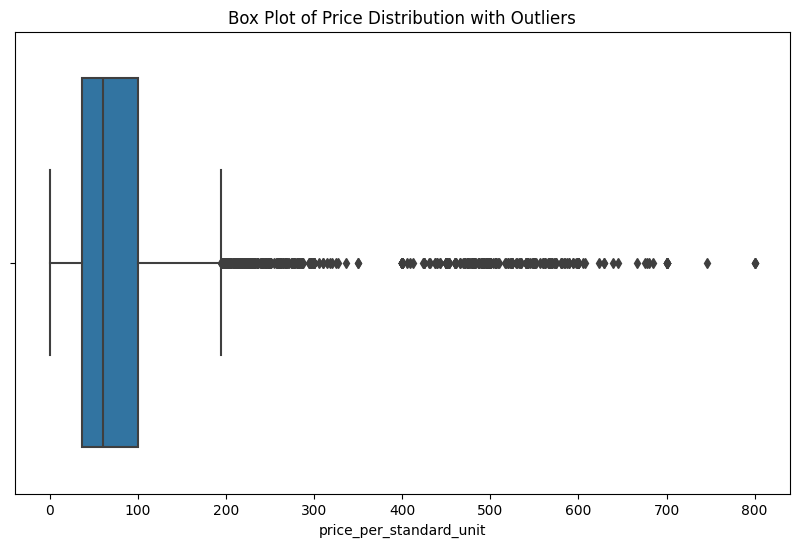

In [184]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_per_standard_unit', data=df)
plt.title('Box Plot of Price Distribution with Outliers')
plt.xlabel('price_per_standard_unit')
plt.show()

## Prices vary depending on the comodity

## EXPLONATORY DATA ANNALYSIS

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


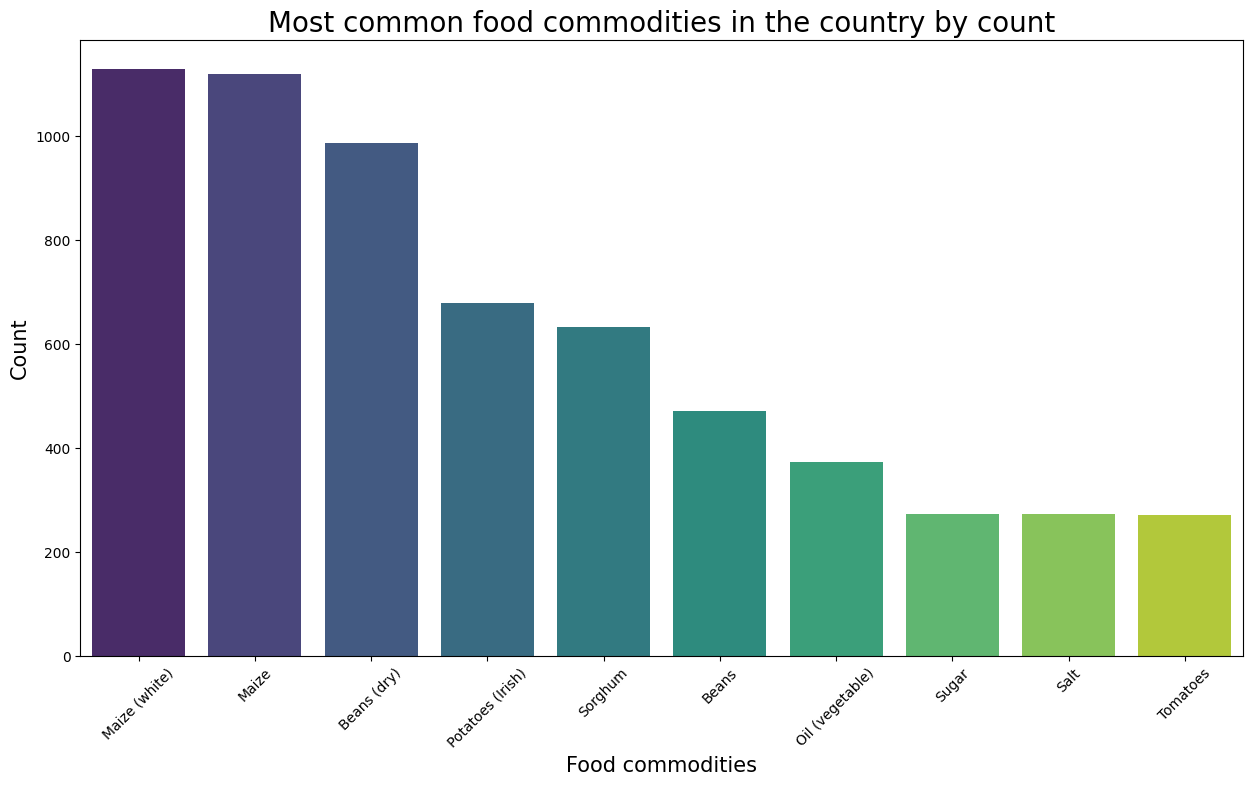

In [186]:

# Sample data
cities = df['commodity'].value_counts()[:10].index
counts = df['commodity'].value_counts()[:10]

# Generate a seaborn color palette
colors = sns.color_palette("viridis", len(cities))

# Plotting the bar graph with unique colors
plt.figure(figsize=(15, 8))
sns.barplot(x=cities, y=counts, palette=colors)
plt.xlabel("Food commodities", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Most common food commodities in the country by count", fontsize=20)
plt.xticks(rotation=45)
plt.show()


c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


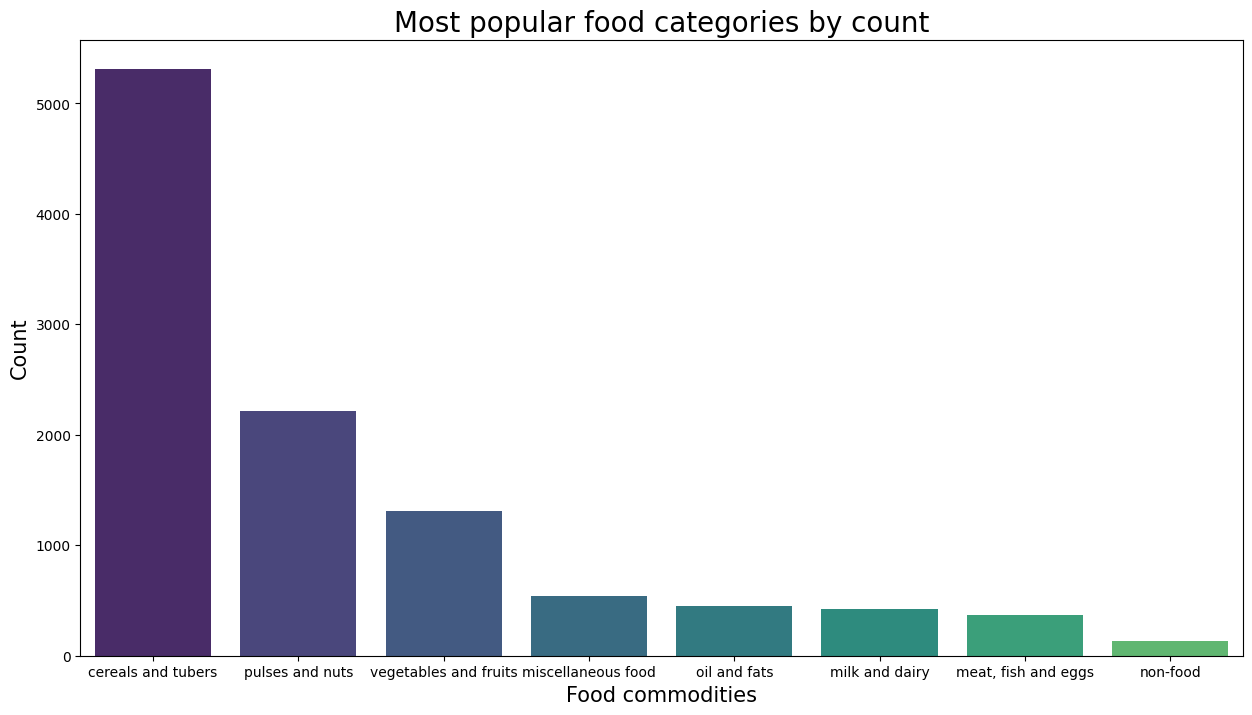

In [187]:
food_categorises = df['category'].value_counts()[:10].index
counts = df['category'].value_counts()[:10]

# Plotting the bar graph with unique colors using Seaborn
colors = sns.color_palette("viridis", len(cities))

plt.figure(figsize=(15, 8))
sns.barplot(x=food_categorises, y=counts, palette=colors)
plt.xlabel("Food commodities", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Most popular food categories by count", fontsize=20)

plt.show()

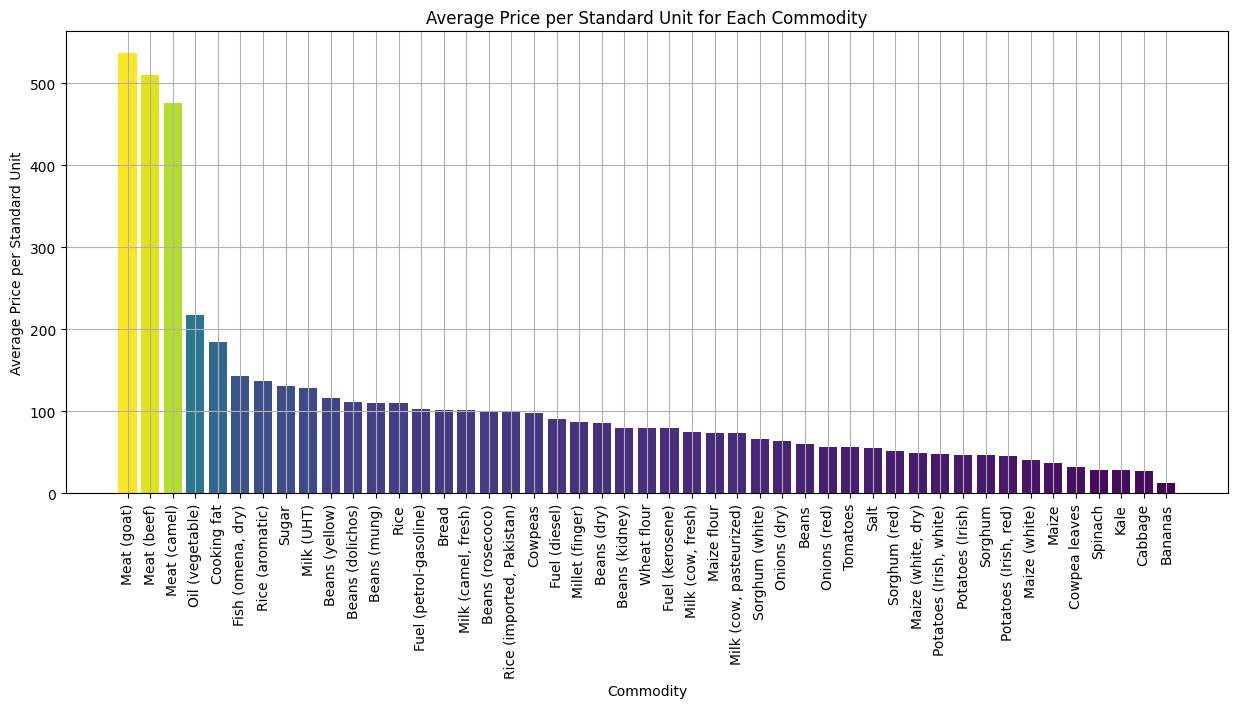

In [188]:

# Calculating the average price per standard unit for each commodity
average_price_per_unit = df.groupby('commodity')['price_per_standard_unit'].mean().sort_values(ascending=False)


cmap = plt.cm.viridis

# Normalizing the average prices to [0, 1] range for colormap mapping
normalized_prices = (average_price_per_unit.values - average_price_per_unit.values.min()) / (average_price_per_unit.values.max() - average_price_per_unit.values.min())

# Creating a bar plot with varied colors based on the average price per standard unit
plt.figure(figsize=(15, 6))
bars = plt.bar(x=average_price_per_unit.index, height=average_price_per_unit.values, color=cmap(normalized_prices))
plt.title('Average Price per Standard Unit for Each Commodity')
plt.xlabel('Commodity')
plt.ylabel('Average Price per Standard Unit')
plt.xticks(rotation=90)
plt.grid(True)




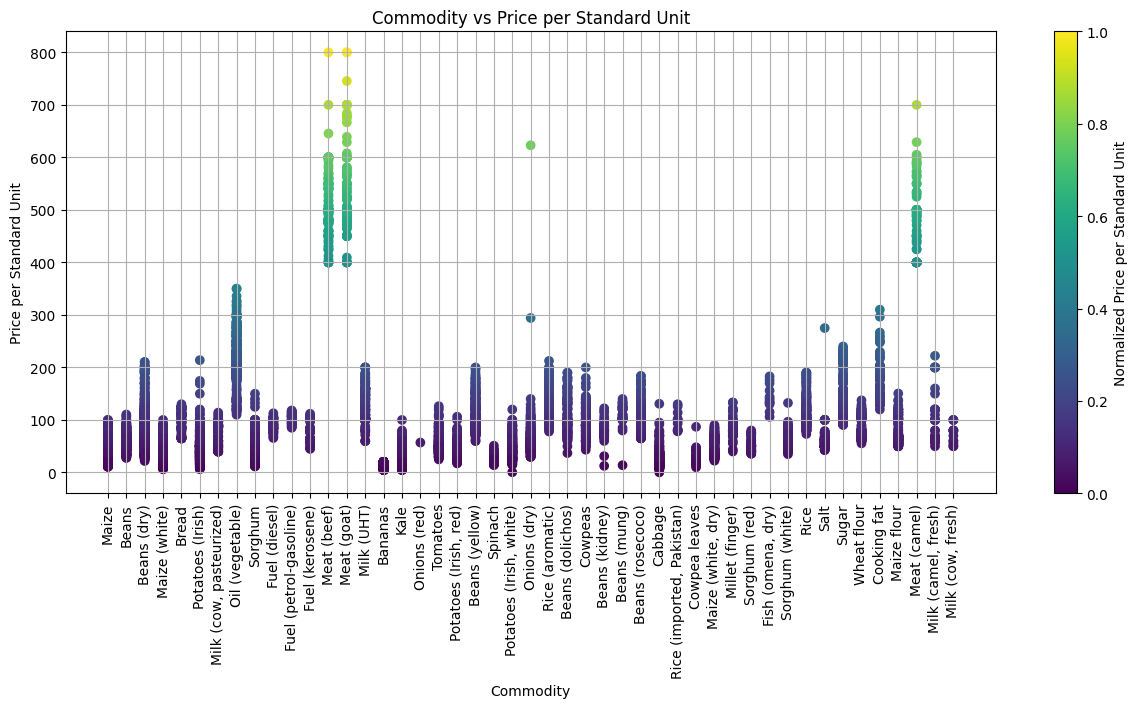

In [189]:
# Define colormap and normalize price_per_standard_unit for colormap mapping
cmap = plt.cm.viridis
normalized_prices = (df['price_per_standard_unit'] - df['price_per_standard_unit'].min()) / (df['price_per_standard_unit'].max() - df['price_per_standard_unit'].min())

# Create scatter plot with varied colors based on price_per_standard_unit
plt.figure(figsize=(15, 6))
plt.scatter(df['commodity'], df['price_per_standard_unit'], c=normalized_prices, cmap=cmap)
plt.title('Commodity vs Price per Standard Unit')
plt.xlabel('Commodity')
plt.ylabel('Price per Standard Unit')
plt.xticks(rotation=90)
plt.colorbar(label='Normalized Price per Standard Unit')
plt.grid(True)
plt.show()

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

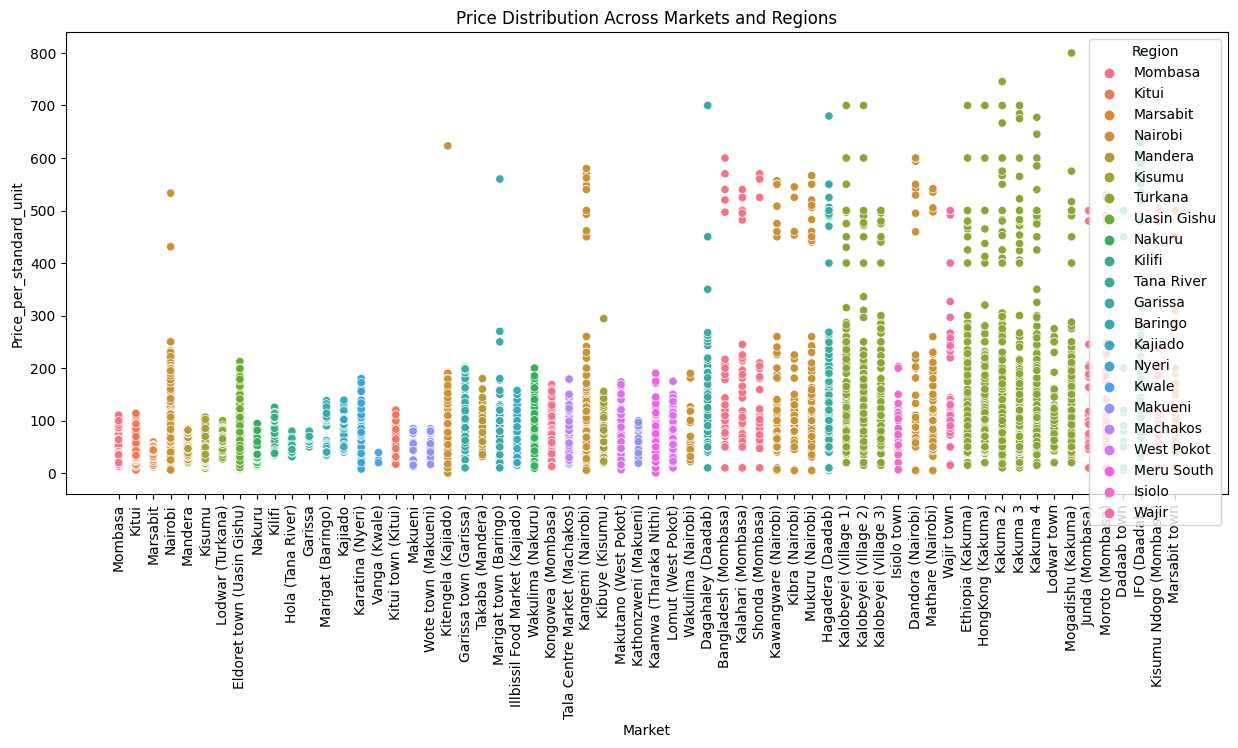

In [195]:
grouped_data = df.groupby(['market', 'Counties'])

# Calculate summary statistics for prices within each group
summary_stats = grouped_data['price_per_standard_unit'].describe()

# Visualize the price distribution across different markets and regions using box plots
plt.figure(figsize=(15, 6))
sns.scatterplot(x='market', y='price_per_standard_unit', hue='Counties', data=df)
plt.title('Price Distribution Across Markets and Regions')
plt.xlabel('Market')
plt.ylabel('Price_per_standard_unit')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.show()


c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

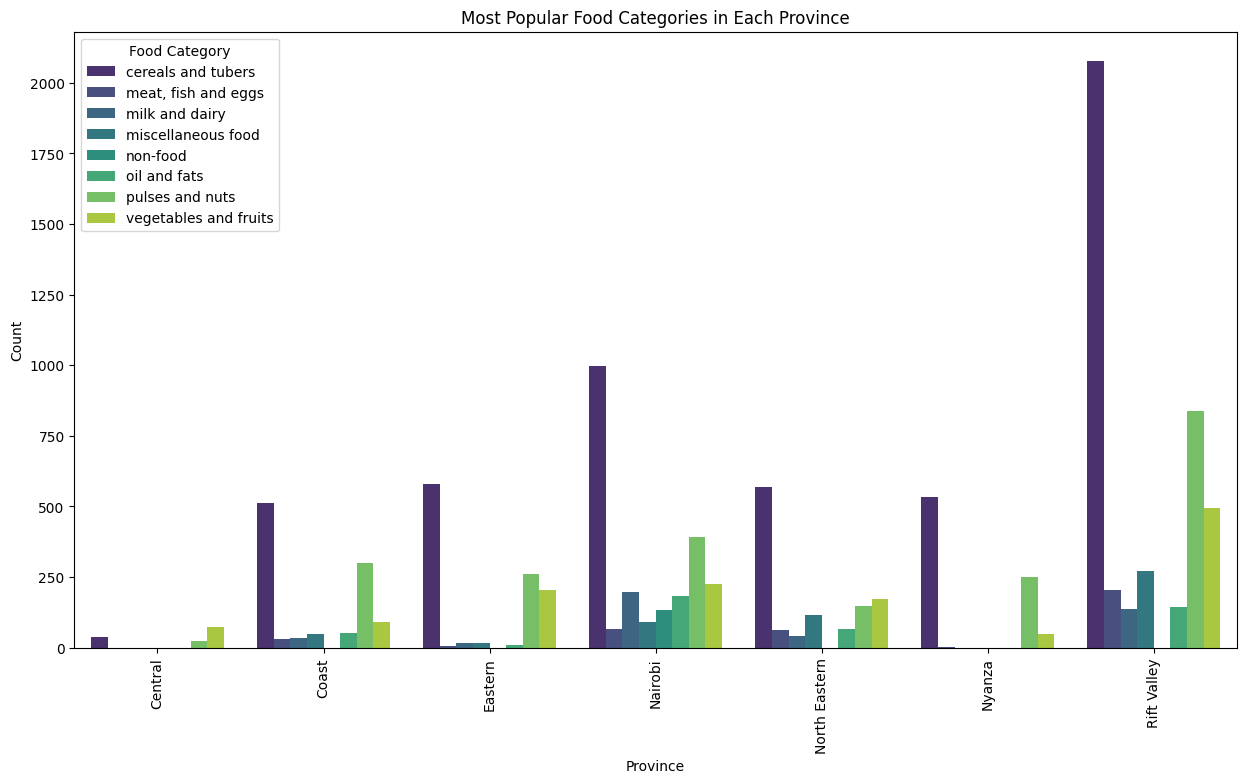

In [202]:
# Group the data by province and food category to count occurrences
province_category_counts = df.groupby(['Provinces', 'category']).size().unstack(fill_value=0)

# Group the data by province and commodity to count occurrences
province_commodity_counts = df.groupby(['Provinces', 'commodity']).size().unstack(fill_value=0)

# Find the most popular food category in each province
most_popular_categories = province_category_counts.idxmax(axis=1)

# Find the most common commodities overall
most_common_commodities = df['commodity'].value_counts().head(10)

# Plot most popular food categories in each province
plt.figure(figsize=(15, 8))
sns.barplot(data=province_category_counts.reset_index().melt(id_vars='Provinces', var_name='Food Category', value_name='Count'),
            x='Provinces', y='Count', hue='Food Category', palette='viridis')
plt.title('Most Popular Food Categories in Each Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Food Category')
plt.show()



In [206]:
provinces_list = df['Provinces'].unique().tolist()
print(len(provinces_list))

7


c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

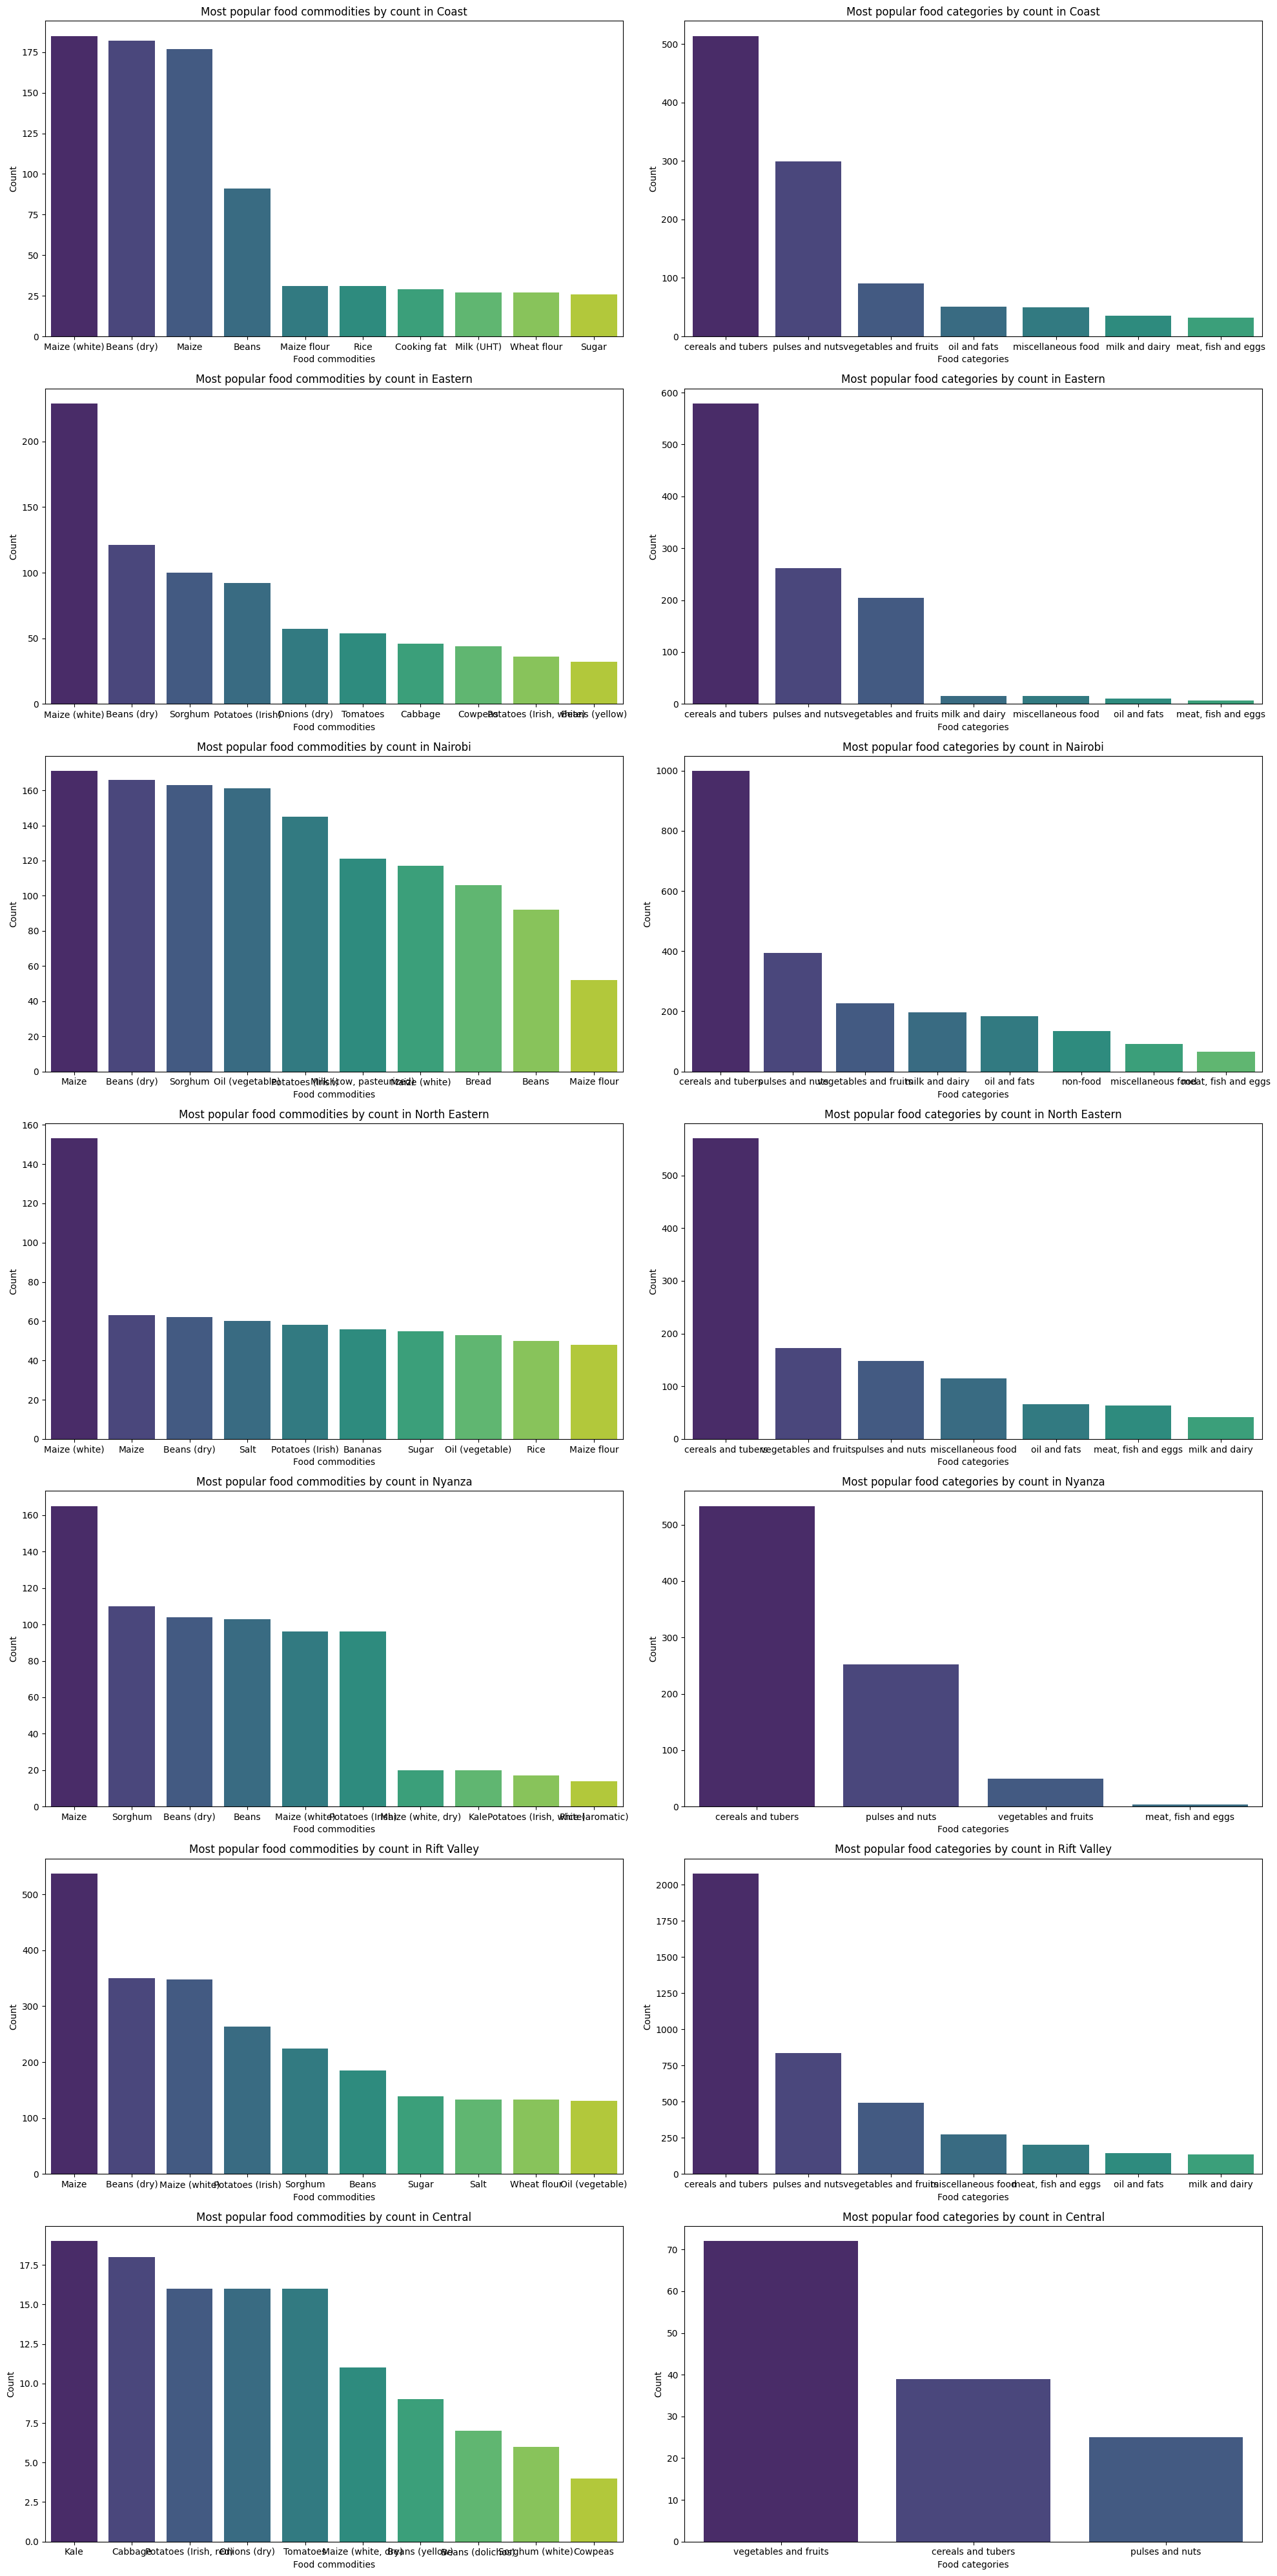

In [208]:
# Create subplots
fig, ax = plt.subplots(7, 2, figsize=(20, 40))

# Loop over provinces
row_count = 0
for province in provinces_list:
    province_df = df.loc[df['Provinces'] == province]

    # Plot most popular food commodities by count
    commodity_cat = province_df['commodity'].value_counts()[:10].index
    commodity_count = province_df['commodity'].value_counts()[:10]
    sns.barplot(x=commodity_cat, y=commodity_count, palette=colors, ax=ax[row_count, 0])
    ax[row_count, 0].set_xlabel("Food commodities")
    ax[row_count, 0].set_ylabel("Count")
    ax[row_count, 0].set_title(f"Most popular food commodities by count in {province}")

    # Plot most popular food categories by count
    food_categories = province_df['category'].value_counts()[:10].index
    food_categories_counts = province_df['category'].value_counts()[:10]
    sns.barplot(x=food_categories, y=food_categories_counts, palette=colors, ax=ax[row_count, 1])
    ax[row_count, 1].set_xlabel("Food categories")
    ax[row_count, 1].set_ylabel("Count")
    ax[row_count, 1].set_title(f"Most popular food categories by count in {province}")

    row_count += 1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()